## Engenharia de Dados - Coleta de Dados

### TODO: Fases da lua, duração dia, horas sol, cotação moedas (dolar, euro, sul americanos)

In [331]:
# Carregar os dados criando uma tabela de segurança
import pandas as pd

file = 'ifood_demanda.csv'
original_df = pd.read_csv(file)
df = original_df.copy()

In [332]:
# Checar as dimensões da tabela (linhas, colunas)
df.shape

(5325, 2)

In [333]:
# Checar o nome das colunas
df.columns

Index(['data', 'id_pedido'], dtype='object')

In [334]:
# Visualizar as primeiras linhas da tabela
df.head()

data  id_pedido
0  2022-08-31 22:58:22.132          1
1  2022-08-31 22:57:51.038          2
2  2022-08-31 22:44:10.026          3
3  2022-08-31 22:32:58.325          4
4  2022-08-31 22:29:14.930          5

In [335]:
# Checar os tipos dos dados das colunas
df.dtypes

data         object
id_pedido     int64
dtype: object

In [336]:
# Converter o tipo de dado da coluna data para formato temporal
df['data'] = pd.to_datetime(df['data'])

In [337]:
# Extrair informações temporais da coluna data
df['tempo'] = df['data'].dt.time
df['segundos'] = df['data'].dt.second
df['minutos'] = df['data'].dt.minute
df['horas'] = df['data'].dt.hour
df['semana_ano'] = df['data'].dt.isocalendar().week
df['trimestre'] = df['data'].dt.quarter
df['ano'] = df['data'].dt.year
df['mes'] = df['data'].dt.month
df['dia'] = df['data'].dt.day
df['dia_semana'] = df['data'].dt.weekday

In [338]:
df.head()

data  id_pedido            tempo  segundos  minutos  \
0 2022-08-31 22:58:22.132          1  22:58:22.132000        22       58   
1 2022-08-31 22:57:51.038          2  22:57:51.038000        51       57   
2 2022-08-31 22:44:10.026          3  22:44:10.026000        10       44   
3 2022-08-31 22:32:58.325          4  22:32:58.325000        58       32   
4 2022-08-31 22:29:14.930          5  22:29:14.930000        14       29   

   horas  semana_ano  trimestre   ano  mes  dia  dia_semana  
0     22          35          3  2022    8   31           2  
1     22          35          3  2022    8   31           2  
2     22          35          3  2022    8   31           2  
3     22          35          3  2022    8   31           2  
4     22          35          3  2022    8   31           2

In [339]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5325 entries, 0 to 5324
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   data        5325 non-null   datetime64[ns]
 1   id_pedido   5325 non-null   int64         
 2   tempo       5325 non-null   object        
 3   segundos    5325 non-null   int64         
 4   minutos     5325 non-null   int64         
 5   horas       5325 non-null   int64         
 6   semana_ano  5325 non-null   UInt32        
 7   trimestre   5325 non-null   int64         
 8   ano         5325 non-null   int64         
 9   mes         5325 non-null   int64         
 10  dia         5325 non-null   int64         
 11  dia_semana  5325 non-null   int64         
dtypes: UInt32(1), datetime64[ns](1), int64(9), object(1)
memory usage: 483.7+ KB


In [340]:
# Padronizar o tipo de dados da variável semana ano
df['semana_ano'] = df['semana_ano'].astype('int64')

In [341]:
# Tratar a coluna tempo
import datetime as dt
df['tempo'] = df['tempo'].apply(lambda t:dt.time(t.hour, t.minute, t.second))

In [342]:
# Converter a coluna tempo em formato de HH-MM-SS
df['tempo'] = pd.to_datetime(df['tempo'], format='%H:%M:%S')

In [343]:
# Reordenar os dados por data ascendente
df.sort_values(by='data', inplace=True, ignore_index=True)

In [344]:
# Calcular a diferença em minutos entre o tempo atual e o tempo anterior
df['tempo desde o último pedido'] = (
    df['tempo'] - df['tempo'].shift(1)).dt.total_seconds() / 60

In [345]:
df.head()

data  id_pedido               tempo  segundos  minutos  \
0 2022-08-02 18:34:35.625       1352 1900-01-01 18:34:35        35       34   
1 2022-08-02 18:40:18.600       1351 1900-01-01 18:40:18        18       40   
2 2022-08-02 18:42:43.414       1350 1900-01-01 18:42:43        43       42   
3 2022-08-02 18:47:22.458       1349 1900-01-01 18:47:22        22       47   
4 2022-08-02 18:55:08.076       1348 1900-01-01 18:55:08         8       55   

   horas  semana_ano  trimestre   ano  mes  dia  dia_semana  \
0     18          31          3  2022    8    2           1   
1     18          31          3  2022    8    2           1   
2     18          31          3  2022    8    2           1   
3     18          31          3  2022    8    2           1   
4     18          31          3  2022    8    2           1   

   tempo desde o último pedido  
0                          NaN  
1                     5.716667  
2                     2.416667  
3                     4.650000  
4                     7.766667

In [346]:
# Checar valores vazios-nulos-erros (pedido inicial)
df.isna().sum()

data                           0
id_pedido                      0
tempo                          0
segundos                       0
minutos                        0
horas                          0
semana_ano                     0
trimestre                      0
ano                            0
mes                            0
dia                            0
dia_semana                     0
tempo desde o último pedido    1
dtype: int64

In [347]:
# Preencher o valor inicial de atraso ns pedidos com 0
df = df.fillna(0)

In [348]:
# Criar uma cópia dos dados tratados
_df = df.copy()

In [349]:
# A
cols = ['semana_ano', 'trimestre', 'mes', 'dia_semana', 'dia', 'horas']
df = df.groupby(cols).count()[['id_pedido']].reset_index()
df.shape

(503, 7)

In [350]:
# Definir a função que verifica se é final de semana (incluindo sexta)
def final_de_semana(dia):
    if dia == 4 or dia == 5 or dia == 6:
        return 1
    else:
        return 0

# Aplicar a função à coluna 'dia' para criar a coluna 'é final de semana'
df['final_semana'] = df['dia'].apply(final_de_semana)

# Mostrar o resultado
df.head()

semana_ano  trimestre  mes  dia_semana  dia  horas  id_pedido  final_semana
0          31          3    8           1    2     18          6             0
1          31          3    8           1    2     19         10             0
2          31          3    8           1    2     20          4             0
3          31          3    8           1    2     21          9             0
4          31          3    8           1    2     22          4             0

#### Feriados

In [351]:
import requests
import bs4

user_agent = {'User-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) \
              AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36'}

In [352]:
url = 'https://www.transportal.com.br/feriados/sc/florianopolis/2022/'

In [353]:
response = requests.get(url=url, headers=user_agent)

In [354]:
soup = bs4.BeautifulSoup(response.content, 'html.parser')

In [355]:
meses_ano = soup.find_all('h2', class_='titulo-mes-feriado')
for mes in meses_ano:
    print(mes.text)

Janeiro
Fevereiro
Março
Abril
Maio
Junho
Julho
Agosto
Setembro
Outubro
Novembro
Dezembro


In [356]:
_meses_ano = [m.text for m in soup.find_all('h2', class_='titulo-mes-feriado')]

In [357]:
feriados = soup.find_all('h2', class_='nome-do-feriado')
for feriado in feriados:
    print(feriado.text)

01/01/2022 - Ano Novo
28/02/2022 - Carnaval
01/03/2022 - Carnaval
02/03/2022 - Carnaval
23/03/2022 - Aniversário da Cidade
01/04/2022 - Dia da Mentira
15/04/2022 - Sexta-Feira Santa
15/04/2022 - Sexta-Feira Santa
17/04/2022 - Páscoa
21/04/2022 - Dia de Tiradentes
01/05/2022 - Dia do Trabalho
08/05/2022 - Dia das Mães
12/06/2022 - Dia dos Namorados
16/06/2022 - Corpus Christi
16/06/2022 - Corpus Christi
Não possui feriados
11/08/2022 - Dia do Estado de Santa Catarina
14/08/2022 - Dia dos Pais
07/09/2022 - Independência do Brasil
12/10/2022 - Nossa Senhora Aparecida
15/10/2022 - Dia do Professor
17/10/2022 - Dia do Comércio
28/10/2022 - Dia do Servidor Público
02/11/2022 - Dia de Finados
02/11/2022 - Finados
15/11/2022 - Proclamação da República
20/11/2022 - Consciência Negra
25/11/2022 - Dia de Santa Catarina de Alexandria
25/12/2022 - Natal


In [358]:
_feriados = [f.text for f in soup.find_all('h2', class_='nome-do-feriado') if f.text != 'Não possui feriados']

In [359]:
_datas = [d[0:10] for d in _feriados if d != 'Não possui']
_datas[0:2]

['01/01/2022', '28/02/2022']

In [360]:
testes = soup.find_all('div', class_='div-feriado-individual')
for t in testes:
    print(t.text)

 01/01/2022 - Ano Novo Feriado Nacional 
 28/02/2022 - Carnaval Facultativo 
 01/03/2022 - Carnaval Facultativo 
 02/03/2022 - Carnaval Facultativo 
 23/03/2022 - Aniversário da Cidade Feriado Municipal 
 01/04/2022 - Dia da Mentira Dia Convencional 
 15/04/2022 - Sexta-Feira Santa Feriado Nacional 
 15/04/2022 - Sexta-Feira Santa Feriado Nacional 
 17/04/2022 - Páscoa Dia Convencional 
 21/04/2022 - Dia de Tiradentes Feriado Nacional 
 01/05/2022 - Dia do Trabalho Feriado Nacional 
 08/05/2022 - Dia das Mães Dia Convencional 
 12/06/2022 - Dia dos Namorados Dia Convencional 
 16/06/2022 - Corpus Christi Facultativo 
 16/06/2022 - Corpus Christi Facultativo 
 11/08/2022 - Dia do Estado de Santa Catarina Dia Convencional 
 14/08/2022 - Dia dos Pais Dia Convencional 
 07/09/2022 - Independência do Brasil Feriado Nacional 
 12/10/2022 - Nossa Senhora Aparecida Feriado Nacional 
 15/10/2022 - Dia do Professor Facultativo 
 17/10/2022 - Dia do Comércio Dia Convencional 
 28/10/2022 - Dia do

In [361]:
from nltk.tokenize import word_tokenize

_tipos_feriados = []

tipos_feriados = soup.find_all('div', class_='div-feriado-individual')
for tipo_feriado in tipos_feriados:
    tipo_feriado = tipo_feriado.text
    tipo_feriado = word_tokenize(tipo_feriado)
    if tipo_feriado[-1] == 'Facultativo':
        _tipos_feriados.append(tipo_feriado[-1])
    else:
        _tipos_feriados.append(tipo_feriado[-2:])

_tipos_feriados

[['Feriado', 'Nacional'],
 'Facultativo',
 'Facultativo',
 'Facultativo',
 ['Feriado', 'Municipal'],
 ['Dia', 'Convencional'],
 ['Feriado', 'Nacional'],
 ['Feriado', 'Nacional'],
 ['Dia', 'Convencional'],
 ['Feriado', 'Nacional'],
 ['Feriado', 'Nacional'],
 ['Dia', 'Convencional'],
 ['Dia', 'Convencional'],
 'Facultativo',
 'Facultativo',
 ['Dia', 'Convencional'],
 ['Dia', 'Convencional'],
 ['Feriado', 'Nacional'],
 ['Feriado', 'Nacional'],
 'Facultativo',
 ['Dia', 'Convencional'],
 'Facultativo',
 ['Feriado', 'Nacional'],
 ['Feriado', 'Municipal'],
 ['Feriado', 'Nacional'],
 ['Dia', 'Convencional'],
 ['Dia', 'Convencional'],
 ['Feriado', 'Nacional']]

In [362]:
print(_meses_ano)
print(_feriados)
print(_tipos_feriados)
print(_datas)

['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']
['01/01/2022 - Ano Novo', '28/02/2022 - Carnaval', '01/03/2022 - Carnaval', '02/03/2022 - Carnaval', '23/03/2022 - Aniversário da Cidade', '01/04/2022 - Dia da Mentira', '15/04/2022 - Sexta-Feira Santa', '15/04/2022 - Sexta-Feira Santa', '17/04/2022 - Páscoa', '21/04/2022 - Dia de Tiradentes', '01/05/2022 - Dia do Trabalho', '08/05/2022 - Dia das Mães', '12/06/2022 - Dia dos Namorados', '16/06/2022 - Corpus Christi', '16/06/2022 - Corpus Christi', '11/08/2022 - Dia do Estado de Santa Catarina', '14/08/2022 - Dia dos Pais', '07/09/2022 - Independência do Brasil', '12/10/2022 - Nossa Senhora Aparecida', '15/10/2022 - Dia do Professor', '17/10/2022 - Dia do Comércio', '28/10/2022 - Dia do Servidor Público', '02/11/2022 - Dia de Finados', '02/11/2022 - Finados', '15/11/2022 - Proclamação da República', '20/11/2022 - Consciência Negra', '25/11/2022 - Dia de Santa Cat

In [363]:
print(len(_meses_ano))
print(len(_feriados))
print(len(_tipos_feriados))
print(len(_datas))

12
28
28
28


In [364]:
feriados = pd.DataFrame({
   'data': _datas, 'feriado': _feriados, 'tipo_feriado': _tipos_feriados
})

feriados

data                                           feriado  \
0   01/01/2022                             01/01/2022 - Ano Novo   
1   28/02/2022                             28/02/2022 - Carnaval   
2   01/03/2022                             01/03/2022 - Carnaval   
3   02/03/2022                             02/03/2022 - Carnaval   
4   23/03/2022                23/03/2022 - Aniversário da Cidade   
5   01/04/2022                       01/04/2022 - Dia da Mentira   
6   15/04/2022                    15/04/2022 - Sexta-Feira Santa   
7   15/04/2022                    15/04/2022 - Sexta-Feira Santa   
8   17/04/2022                               17/04/2022 - Páscoa   
9   21/04/2022                    21/04/2022 - Dia de Tiradentes   
10  01/05/2022                      01/05/2022 - Dia do Trabalho   
11  08/05/2022                         08/05/2022 - Dia das Mães   
12  12/06/2022                    12/06/2022 - Dia dos Namorados   
13  16/06/2022                       16/06/2022 - Corpus Christi   
14  16/06/2022                       16/06/2022 - Corpus Christi   
15  11/08/2022      11/08/2022 - Dia do Estado de Santa Catarina   
16  14/08/2022                         14/08/2022 - Dia dos Pais   
17  07/09/2022              07/09/2022 - Independência do Brasil   
18  12/10/2022              12/10/2022 - Nossa Senhora Aparecida   
19  15/10/2022                     15/10/2022 - Dia do Professor   
20  17/10/2022                      17/10/2022 - Dia do Comércio   
21  28/10/2022              28/10/2022 - Dia do Servidor Público   
22  02/11/2022                       02/11/2022 - Dia de Finados   
23  02/11/2022                              02/11/2022 - Finados   
24  15/11/2022             15/11/2022 - Proclamação da República   
25  20/11/2022                    20/11/2022 - Consciência Negra   
26  25/11/2022  25/11/2022 - Dia de Santa Catarina de Alexandria   
27  25/12/2022                                25/12/2022 - Natal   

            tipo_feriado  
0    [Feriado, Nacional]  
1            Facultativo  
2            Facultativo  
3            Facultativo  
4   [Feriado, Municipal]  
5    [Dia, Convencional]  
6    [Feriado, Nacional]  
7    [Feriado, Nacional]  
8    [Dia, Convencional]  
9    [Feriado, Nacional]  
10   [Feriado, Nacional]  
11   [Dia, Convencional]  
12   [Dia, Convencional]  
13           Facultativo  
14           Facultativo  
15   [Dia, Convencional]  
16   [Dia, Convencional]  
17   [Feriado, Nacional]  
18   [Feriado, Nacional]  
19           Facultativo  
20   [Dia, Convencional]  
21           Facultativo  
22   [Feriado, Nacional]  
23  [Feriado, Municipal]  
24   [Feriado, Nacional]  
25   [Dia, Convencional]  
26   [Dia, Convencional]  
27   [Feriado, Nacional]

In [365]:
feriados_copia = feriados.copy()

In [366]:
df1 = feriados.copy()

In [367]:
for data_feriado in df1['feriado']:
    data_feriado = data_feriado[13:]
    print(data_feriado)

Ano Novo
Carnaval
Carnaval
Carnaval
Aniversário da Cidade
Dia da Mentira
Sexta-Feira Santa
Sexta-Feira Santa
Páscoa
Dia de Tiradentes
Dia do Trabalho
Dia das Mães
Dia dos Namorados
Corpus Christi
Corpus Christi
Dia do Estado de Santa Catarina
Dia dos Pais
Independência do Brasil
Nossa Senhora Aparecida
Dia do Professor
Dia do Comércio
Dia do Servidor Público
Dia de Finados
Finados
Proclamação da República
Consciência Negra
Dia de Santa Catarina de Alexandria
Natal


In [368]:
datas_feriados = [data_feriado[13:] for data_feriado in df1['feriado']]
df1['feriado'] = datas_feriados
df1.head()

data                feriado          tipo_feriado
0  01/01/2022               Ano Novo   [Feriado, Nacional]
1  28/02/2022               Carnaval           Facultativo
2  01/03/2022               Carnaval           Facultativo
3  02/03/2022               Carnaval           Facultativo
4  23/03/2022  Aniversário da Cidade  [Feriado, Municipal]

In [369]:
tipos_feriados = []
for tipo_feriado in df1.tipo_feriado:
    if str(tipo_feriado).startswith('['):
        tipo_feriado = str(tipo_feriado)[1:-1]
        tipo_feriado = tipo_feriado.replace("'", '')
        tipo_feriado = tipo_feriado.replace(",", '')
        print(tipo_feriado)
        tipos_feriados.append(tipo_feriado)
    else:
        print(tipo_feriado)
        tipos_feriados.append(tipo_feriado)

Feriado Nacional
Facultativo
Facultativo
Facultativo
Feriado Municipal
Dia Convencional
Feriado Nacional
Feriado Nacional
Dia Convencional
Feriado Nacional
Feriado Nacional
Dia Convencional
Dia Convencional
Facultativo
Facultativo
Dia Convencional
Dia Convencional
Feriado Nacional
Feriado Nacional
Facultativo
Dia Convencional
Facultativo
Feriado Nacional
Feriado Municipal
Feriado Nacional
Dia Convencional
Dia Convencional
Feriado Nacional


In [370]:
df1['tipo_feriado'] = tipos_feriados

In [371]:
df1.head()

data                feriado       tipo_feriado
0  01/01/2022               Ano Novo   Feriado Nacional
1  28/02/2022               Carnaval        Facultativo
2  01/03/2022               Carnaval        Facultativo
3  02/03/2022               Carnaval        Facultativo
4  23/03/2022  Aniversário da Cidade  Feriado Municipal

In [372]:
df1

data                              feriado       tipo_feriado
0   01/01/2022                             Ano Novo   Feriado Nacional
1   28/02/2022                             Carnaval        Facultativo
2   01/03/2022                             Carnaval        Facultativo
3   02/03/2022                             Carnaval        Facultativo
4   23/03/2022                Aniversário da Cidade  Feriado Municipal
5   01/04/2022                       Dia da Mentira   Dia Convencional
6   15/04/2022                    Sexta-Feira Santa   Feriado Nacional
7   15/04/2022                    Sexta-Feira Santa   Feriado Nacional
8   17/04/2022                               Páscoa   Dia Convencional
9   21/04/2022                    Dia de Tiradentes   Feriado Nacional
10  01/05/2022                      Dia do Trabalho   Feriado Nacional
11  08/05/2022                         Dia das Mães   Dia Convencional
12  12/06/2022                    Dia dos Namorados   Dia Convencional
13  16/06/2022                       Corpus Christi        Facultativo
14  16/06/2022                       Corpus Christi        Facultativo
15  11/08/2022      Dia do Estado de Santa Catarina   Dia Convencional
16  14/08/2022                         Dia dos Pais   Dia Convencional
17  07/09/2022              Independência do Brasil   Feriado Nacional
18  12/10/2022              Nossa Senhora Aparecida   Feriado Nacional
19  15/10/2022                     Dia do Professor        Facultativo
20  17/10/2022                      Dia do Comércio   Dia Convencional
21  28/10/2022              Dia do Servidor Público        Facultativo
22  02/11/2022                       Dia de Finados   Feriado Nacional
23  02/11/2022                              Finados  Feriado Municipal
24  15/11/2022             Proclamação da República   Feriado Nacional
25  20/11/2022                    Consciência Negra   Dia Convencional
26  25/11/2022  Dia de Santa Catarina de Alexandria   Dia Convencional
27  25/12/2022                                Natal   Feriado Nacional

In [373]:
df1.to_csv('feriados.csv', index=False)

#### Temperatura

In [374]:
!pip install meteostat

In [375]:
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily, Hourly

lat, lon = -27.431368579639322, -48.457435374044415

start = datetime(2022, 8, 2)
end = datetime(2023, 3, 31)

local = Point(lat, lon, 0)

temp_dia = Daily(local, start, end)
temp_dia = temp_dia.fetch().reset_index()

temp_dia.drop(['snow', 'wpgt', 'tsun'], axis=1, inplace=True)
temp_dia.columns = ['data', 'temp_media_dia', 'temp_min_dia', 'temp_max_dia', 
                    'preciptacao_dia', 'vento_direcao_dia', 
                    'vento_velocidade_dia', 'pressao_atm_dia']

temp_dia.head()

data  temp_media_dia  temp_min_dia  temp_max_dia  preciptacao_dia  \
0 2022-08-02            17.4          14.0          21.8              0.0   
1 2022-08-03            18.8          17.2          21.2              0.0   
2 2022-08-04            19.9          18.4          23.7              0.7   
3 2022-08-05            17.9          15.6          20.6              0.0   
4 2022-08-06            15.6          14.7          17.0              3.0   

   vento_direcao_dia  vento_velocidade_dia  pressao_atm_dia  
0              317.0                   5.6           1018.7  
1              333.0                  11.6           1018.1  
2                0.0                  12.3           1009.9  
3              176.0                  13.4           1013.5  
4              139.0                   8.8           1020.3

In [376]:
start = datetime(2022, 8, 2)
end = datetime(2023, 3, 31, 23, 29)

temp_hora = Hourly(local, start, end)
temp_hora = temp_hora.fetch().reset_index()
temp_hora.head()

time  temp  dwpt   rhum  prcp  snow   wdir  wspd  wpgt  \
0 2022-08-02 00:00:00  16.8  15.8   94.0   0.0   NaN   19.0   0.4   NaN   
1 2022-08-02 01:00:00  16.3  15.8   97.0   0.0   NaN  241.0   2.5   NaN   
2 2022-08-02 02:00:00  16.0  15.8   99.0   0.0   NaN  238.0   3.2   NaN   
3 2022-08-02 03:00:00  15.5  15.5  100.0   0.0   NaN  248.0   4.3   NaN   
4 2022-08-02 04:00:00  15.4  15.4  100.0   0.0   NaN  244.0   4.0   NaN   

     pres  tsun  coco  
0  1018.1   NaN   1.0  
1  1018.5   NaN   1.0  
2  1018.8   NaN   1.0  
3  1019.0   NaN   1.0  
4  1018.8   NaN   2.0

In [377]:
temp_hora.drop(['snow', 'wpgt', 'tsun'], axis=1, inplace=True)
temp_hora.columns = ['data_hora', 'temperatura_hora', 
                     'sensacao_termica_hora', 'umidade_relat_hora', 
                     'precip_hora', 'vento_dir_hora', 'vento_velo_hora', 
                     'pressao_atm_hora', 'condicao_climatica']
temp_hora.head()

data_hora  temperatura_hora  sensacao_termica_hora  \
0 2022-08-02 00:00:00              16.8                   15.8   
1 2022-08-02 01:00:00              16.3                   15.8   
2 2022-08-02 02:00:00              16.0                   15.8   
3 2022-08-02 03:00:00              15.5                   15.5   
4 2022-08-02 04:00:00              15.4                   15.4   

   umidade_relat_hora  precip_hora  vento_dir_hora  vento_velo_hora  \
0                94.0          0.0            19.0              0.4   
1                97.0          0.0           241.0              2.5   
2                99.0          0.0           238.0              3.2   
3               100.0          0.0           248.0              4.3   
4               100.0          0.0           244.0              4.0   

   pressao_atm_hora  condicao_climatica  
0            1018.1                 1.0  
1            1018.5                 1.0  
2            1018.8                 1.0  
3            1019.0                 1.0  
4            1018.8                 2.0

In [378]:
temp_hora['mes'] = temp_hora['data_hora'].dt.month
temp_hora['dia'] = temp_hora['data_hora'].dt.day
temp_hora['hora'] = temp_hora['data_hora'].dt.hour

In [379]:
temp_dia['mes'] = temp_dia['data'].dt.month
temp_dia['dia'] = temp_dia['data'].dt.day

In [380]:
display(temp_hora.tail(3))
display(temp_dia.tail(3))

data_hora  temperatura_hora  sensacao_termica_hora  \
5805 2023-03-31 21:00:00              25.3                   21.8   
5806 2023-03-31 22:00:00              23.9                   21.8   
5807 2023-03-31 23:00:00              23.6                   21.9   

      umidade_relat_hora  precip_hora  vento_dir_hora  vento_velo_hora  \
5805                81.0          0.0            96.0              7.9   
5806                88.0          0.0            88.0              4.0   
5807                90.0          0.0            16.0              4.3   

      pressao_atm_hora  condicao_climatica  mes  dia  hora  
5805            1012.1                 1.0    3   31    21  
5806            1012.5                 1.0    3   31    22  
5807            1012.8                 1.0    3   31    23

data  temp_media_dia  temp_min_dia  temp_max_dia  preciptacao_dia  \
239 2023-03-29            25.0          22.2          29.9              5.5   
240 2023-03-30            24.8          20.8          30.3              0.5   
241 2023-03-31            24.3          20.4          28.8              0.0   

     vento_direcao_dia  vento_velocidade_dia  pressao_atm_dia  mes  dia  
239              339.0                  18.7           1014.1    3   29  
240              221.0                  13.2           1013.8    3   30  
241              322.0                   7.6           1013.5    3   31

In [381]:
temperatura = temp_hora.merge(temp_dia, on=['mes', 'dia'])
temperatura.head(3)

data_hora  temperatura_hora  sensacao_termica_hora  \
0 2022-08-02 00:00:00              16.8                   15.8   
1 2022-08-02 01:00:00              16.3                   15.8   
2 2022-08-02 02:00:00              16.0                   15.8   

   umidade_relat_hora  precip_hora  vento_dir_hora  vento_velo_hora  \
0                94.0          0.0            19.0              0.4   
1                97.0          0.0           241.0              2.5   
2                99.0          0.0           238.0              3.2   

   pressao_atm_hora  condicao_climatica  mes  dia  hora       data  \
0            1018.1                 1.0    8    2     0 2022-08-02   
1            1018.5                 1.0    8    2     1 2022-08-02   
2            1018.8                 1.0    8    2     2 2022-08-02   

   temp_media_dia  temp_min_dia  temp_max_dia  preciptacao_dia  \
0            17.4          14.0          21.8              0.0   
1            17.4          14.0          21.8              0.0   
2            17.4          14.0          21.8              0.0   

   vento_direcao_dia  vento_velocidade_dia  pressao_atm_dia  
0              317.0                   5.6           1018.7  
1              317.0                   5.6           1018.7  
2              317.0                   5.6           1018.7

In [382]:
temperatura.to_csv('temperaturas_sujo.csv', index=False)

#### Cotações moedas

In [383]:
import pytz
pytz.all_timezones[55:65]

['America/Anchorage',
 'America/Anguilla',
 'America/Antigua',
 'America/Araguaina',
 'America/Argentina/Buenos_Aires',
 'America/Argentina/Catamarca',
 'America/Argentina/ComodRivadavia',
 'America/Argentina/Cordoba',
 'America/Argentina/Jujuy',
 'America/Argentina/La_Rioja']

In [384]:
!pip install yfinance

In [385]:
#import yfinance as yf # https://dev.meteostat.net/python/#example

#start = (2022, 8, 2)
#end = (2023, 3, 31)

In [386]:
#def cotacao(moeda, ticker):
    #moeda = yf.download(ticker, start='2022-08-02', end='2023-03-31', interval='1h')
    #moeda = moeda.reset_index()
    #moeda = moeda.tz_convert('America/Buenos_Aires').reset_index()
    #moeda = moeda[['Datetime', 'Adj Close']]
    #moeda.columns = ['data_hora', moeda]
    #moeda['data_hora'] = pd.to_datetime(moeda['data_hora'])
    #display(moeda.head(3))
    #display(moeda.tail(3))

In [387]:
#cotacao('dolar', 'USDBRL=X')

In [388]:
_df.head(1)

data  id_pedido               tempo  segundos  minutos  \
0 2022-08-02 18:34:35.625       1352 1900-01-01 18:34:35        35       34   

   horas  semana_ano  trimestre   ano  mes  dia  dia_semana  \
0     18          31          3  2022    8    2           1   

   tempo desde o último pedido  
0                          0.0

In [389]:
df.head(1)

semana_ano  trimestre  mes  dia_semana  dia  horas  id_pedido  final_semana
0          31          3    8           1    2     18          6             0

In [390]:
temperatura.head(1)

data_hora  temperatura_hora  sensacao_termica_hora  umidade_relat_hora  \
0 2022-08-02              16.8                   15.8                94.0   

   precip_hora  vento_dir_hora  vento_velo_hora  pressao_atm_hora  \
0          0.0            19.0              0.4            1018.1   

   condicao_climatica  mes  dia  hora       data  temp_media_dia  \
0                 1.0    8    2     0 2022-08-02            17.4   

   temp_min_dia  temp_max_dia  preciptacao_dia  vento_direcao_dia  \
0          14.0          21.8              0.0              317.0   

   vento_velocidade_dia  pressao_atm_dia  
0                   5.6           1018.7

In [391]:
temperatura.columns = ['data_hora', 'temperatura_hora', 'sensacao_termica_hora',
       'umidade_relat_hora', 'precip_hora', 'vento_dir_hora',
       'vento_velo_hora', 'pressao_atm_hora', 'condicao_climatica', 'mes',
       'dia', 'horas', 'data', 'temp_media_dia', 'temp_min_dia', 'temp_max_dia',
       'preciptacao_dia', 'vento_direcao_dia', 'vento_velocidade_dia',
       'pressao_atm_dia']

In [392]:
df1.head(1)

data   feriado      tipo_feriado
0  01/01/2022  Ano Novo  Feriado Nacional

In [393]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)

In [394]:
df_new = df.merge(temperatura, on=['mes', 'dia', 'horas'])
df_new.head(1)

semana_ano  trimestre  mes  dia_semana  dia  horas  id_pedido  \
0          31          3    8           1    2     18          6   

   final_semana           data_hora  temperatura_hora  sensacao_termica_hora  \
0             0 2022-08-02 18:00:00              21.0                   16.8   

   umidade_relat_hora  precip_hora  vento_dir_hora  vento_velo_hora  \
0                77.0          0.0            35.0             11.2   

   pressao_atm_hora  condicao_climatica       data  temp_media_dia  \
0            1017.3                 3.0 2022-08-02            17.4   

   temp_min_dia  temp_max_dia  preciptacao_dia  vento_direcao_dia  \
0          14.0          21.8              0.0              317.0   

   vento_velocidade_dia  pressao_atm_dia  
0                   5.6           1018.7

In [395]:
df_new.shape

(503, 25)

In [396]:
df1['data'] = pd.to_datetime(df1['data'], format='%d/%m/%Y')
df1['mes'] = df1['data'].dt.month
df1['dia'] = df1['data'].dt.day

In [397]:
df_ = df_new.merge(df1, on=['mes', 'dia'], how='left')

In [398]:
df_.shape

(509, 28)

In [399]:
df_.head(1)

semana_ano  trimestre  mes  dia_semana  dia  horas  id_pedido  \
0          31          3    8           1    2     18          6   

   final_semana           data_hora  temperatura_hora  sensacao_termica_hora  \
0             0 2022-08-02 18:00:00              21.0                   16.8   

   umidade_relat_hora  precip_hora  vento_dir_hora  vento_velo_hora  \
0                77.0          0.0            35.0             11.2   

   pressao_atm_hora  condicao_climatica     data_x  temp_media_dia  \
0            1017.3                 3.0 2022-08-02            17.4   

   temp_min_dia  temp_max_dia  preciptacao_dia  vento_direcao_dia  \
0          14.0          21.8              0.0              317.0   

   vento_velocidade_dia  pressao_atm_dia data_y feriado tipo_feriado  
0                   5.6           1018.7    NaT     NaN          NaN

In [400]:
df_ = df_.drop_duplicates(keep='first')
df_.shape

(509, 28)

In [401]:
df_ = df_.drop(['data_hora', 'data_x', 'data_y'], axis=1)

In [402]:
df_.head(1).T

0
semana_ano                 31
trimestre                   3
mes                         8
dia_semana                  1
dia                         2
horas                      18
id_pedido                   6
final_semana                0
temperatura_hora         21.0
sensacao_termica_hora    16.8
umidade_relat_hora       77.0
precip_hora               0.0
vento_dir_hora           35.0
vento_velo_hora          11.2
pressao_atm_hora       1017.3
condicao_climatica        3.0
temp_media_dia           17.4
temp_min_dia             14.0
temp_max_dia             21.8
preciptacao_dia           0.0
vento_direcao_dia       317.0
vento_velocidade_dia      5.6
pressao_atm_dia        1018.7
feriado                   NaN
tipo_feriado              NaN

In [403]:
df_.isna().sum()

semana_ano                 0
trimestre                  0
mes                        0
dia_semana                 0
dia                        0
horas                      0
id_pedido                  0
final_semana               0
temperatura_hora           0
sensacao_termica_hora      0
umidade_relat_hora         0
precip_hora                0
vento_dir_hora             0
vento_velo_hora            0
pressao_atm_hora           0
condicao_climatica         0
temp_media_dia             0
temp_min_dia               0
temp_max_dia               0
preciptacao_dia            0
vento_direcao_dia          0
vento_velocidade_dia       0
pressao_atm_dia            0
feriado                  457
tipo_feriado             457
dtype: int64

In [404]:
df_ = df_.fillna(0)

In [405]:
df_.columns = ['semana_ano', 'trimestre', 'mes', 'dia_semana', 'dia', 'horas',
       'id_pedido', 'final_semana', 'temperatura_hora',
       'sensacao_termica_hora', 'umidade_relat_hora', 'precip_hora',
       'vento_dir_hora', 'vento_velo_hora', 'pressao_atm_hora',
       'condicao_climatica', 'temp_media_dia', 'temp_min_dia', 'temp_max_dia',
       'preciptacao_dia', 'vento_direcao_dia', 'vento_velocidade_dia',
       'pressao_atm_dia', 'nome_feriado', 'tipo_feriado']

In [406]:
df_['feriado'] = df_['nome_feriado'].apply(lambda x: 1 if x != 0 else 0)

In [407]:
df = df_.copy()

In [408]:
print(df.feriado.value_counts(normalize=True))
print(df.feriado.value_counts())

0    0.897839
1    0.102161
Name: feriado, dtype: float64
0    457
1     52
Name: feriado, dtype: int64


In [409]:
temporario = []
for f1, f2 in zip(df['final_semana'], df['feriado']):
    if f1 == 1 or f2 == 1:
        temporario.append(1)
    else:
        temporario.append(0)
        
df['feriado_ou_findi'] = temporario

In [410]:
df.tail()

semana_ano  trimestre  mes  dia_semana  dia  horas  id_pedido  \
504          48          4   11           2   30     18          6   
505          48          4   11           2   30     19         12   
506          48          4   11           2   30     20         23   
507          48          4   11           2   30     21         13   
508          48          4   11           2   30     22          5   

     final_semana  temperatura_hora  sensacao_termica_hora  \
504             0              22.2                   20.1   
505             0              21.9                   20.4   
506             0              21.8                   20.3   
507             0              21.8                   20.4   
508             0              21.3                   20.5   

     umidade_relat_hora  precip_hora  vento_dir_hora  vento_velo_hora  \
504                88.0          1.1           123.0              9.4   
505                91.0          1.3            95.0              9.7   
506                91.0          1.6           125.0              9.0   
507                92.0          3.0            97.0             11.2   
508                95.0          0.9           102.0             11.2   

     pressao_atm_hora  condicao_climatica  temp_media_dia  temp_min_dia  \
504            1006.7                 9.0            21.6          20.8   
505            1006.2                 9.0            21.6          20.8   
506            1006.1                 9.0            21.6          20.8   
507            1006.1                 9.0            21.6          20.8   
508            1007.0                 8.0            21.6          20.8   

     temp_max_dia  preciptacao_dia  vento_direcao_dia  vento_velocidade_dia  \
504          22.8             31.5              106.0                  10.5   
505          22.8             31.5              106.0                  10.5   
506          22.8             31.5              106.0                  10.5   
507          22.8             31.5              106.0                  10.5   
508          22.8             31.5              106.0                  10.5   

     pressao_atm_dia nome_feriado tipo_feriado  feriado  feriado_ou_findi  
504           1007.3            0            0        0                 0  
505           1007.3            0            0        0                 0  
506           1007.3            0            0        0                 0  
507           1007.3            0            0        0                 0  
508           1007.3            0            0        0                 0

In [411]:
df.shape

(509, 27)

In [412]:
df = df[['id_pedido', 'dia_semana', 'horas', 'dia', 'mes', 
              'trimestre', 'semana_ano', 'final_semana', 
              'feriado', 'feriado_ou_findi', 'tipo_feriado', 
              'nome_feriado', 'condicao_climatica', 'precip_hora', 
              'preciptacao_dia','temperatura_hora', 'temp_media_dia', 
              'temp_min_dia', 'temp_max_dia','sensacao_termica_hora', 
              'umidade_relat_hora', 'vento_dir_hora', 'vento_direcao_dia', 
              'vento_velo_hora', 'vento_velocidade_dia',
              'pressao_atm_hora', 'pressao_atm_dia']]

In [413]:
df.shape

(509, 27)

In [414]:
df = df.rename(columns={'id_pedido': 'pedidos_hora'})

In [415]:
df.dia_semana = df.dia_semana.map({
    0: 'segunda-feira', 1: 'terca-feira', 2: 'quarta-feira', 
    3: 'quinta-feira', 4: 'sexta-feira', 5: 'sabado', 6: 'domingo'
})

In [416]:
df.head()

pedidos_hora   dia_semana  horas  dia  mes  trimestre  semana_ano  \
0             6  terca-feira     18    2    8          3          31   
1            10  terca-feira     19    2    8          3          31   
2             4  terca-feira     20    2    8          3          31   
3             9  terca-feira     21    2    8          3          31   
4             4  terca-feira     22    2    8          3          31   

   final_semana  feriado  feriado_ou_findi tipo_feriado nome_feriado  \
0             0        0                 0            0            0   
1             0        0                 0            0            0   
2             0        0                 0            0            0   
3             0        0                 0            0            0   
4             0        0                 0            0            0   

   condicao_climatica  precip_hora  preciptacao_dia  temperatura_hora  \
0                 3.0          0.0              0.0              21.0   
1                 3.0          0.0              0.0              19.6   
2                 3.0          0.0              0.0              18.7   
3                 3.0          0.0              0.0              17.7   
4                 3.0          0.0              0.0              17.7   

   temp_media_dia  temp_min_dia  temp_max_dia  sensacao_termica_hora  \
0            17.4          14.0          21.8                   16.8   
1            17.4          14.0          21.8                   16.6   
2            17.4          14.0          21.8                   16.5   
3            17.4          14.0          21.8                   16.4   
4            17.4          14.0          21.8                   16.2   

   umidade_relat_hora  vento_dir_hora  vento_direcao_dia  vento_velo_hora  \
0                77.0            35.0              317.0             11.2   
1                83.0            31.0              317.0             11.9   
2                87.0            29.0              317.0              9.7   
3                92.0            27.0              317.0              5.0   
4                91.0            18.0              317.0              4.0   

   vento_velocidade_dia  pressao_atm_hora  pressao_atm_dia  
0                   5.6            1017.3           1018.7  
1                   5.6            1017.4           1018.7  
2                   5.6            1017.8           1018.7  
3                   5.6            1018.5           1018.7  
4                   5.6            1018.8           1018.7

In [417]:
df.condicao_climatica.unique()

array([ 3.,  2.,  1.,  8.,  9., 17.,  7., 18.])

Code	Weather Condition

1	Clear
2	Fair
3	Cloudy
7	Light Rain
8	Rain
9	Heavy Rain
17	Rain Shower
18	Heavy Rain Shower

1 Limpo/Céu claro
2 Justo/Bom tempo
3 Nublado
7 Garoa leve
8 Chuva
9 Chuva forte
17 Chuva com trovoadas
18 Chuva forte com trovoadas

Podemos agrupar as seguintes condições meteorológicas em 3 categorias:

* Categoria 1: Limpo/Céu claro (1) e Justo/Bom tempo (2)
* Categoria 2: Nublado (3), Garoa leve (7) e Chuva (8)
* Categoria 3: Chuva forte (9), Chuva com trovoadas (17) e Chuva forte com trovoadas (18)

Essa divisão é útil porque as condições da categoria 1 indicam tempo bom e ensolarado, enquanto as da categoria 2 indicam um dia nublado ou chuvoso, mas sem condições meteorológicas extremas. Já a categoria 3 indica chuvas fortes e com risco de trovoadas, que podem representar riscos para a segurança em algumas situações.

No entanto, dependendo do contexto em que as condições meteorológicas são usadas, outras combinações de agrupamento podem ser mais úteis ou apropriadas. Por exemplo, se estivermos interessados em analisar o impacto das condições climáticas nas atividades ao ar livre, pode ser útil agrupar as condições meteorológicas em categorias mais detalhadas, como ensolarado, parcialmente nublado, chuvoso leve, chuvoso moderado e chuvoso forte.

In [418]:
df.condicao_climatica = df.condicao_climatica.map({
    1: 1, 2: 1, 3: 2, 7: 2, 8: 2, 9: 3, 17: 3, 18: 3
})

In [419]:
df.condicao_climatica.unique()

array([2, 1, 3], dtype=int64)

In [420]:
df.condicao_climatica = df.condicao_climatica.map({
    1: 'Sol/Limpo', 2: 'Nublado/Chuva' , 3: 'Chuva forte/Tempestade'
})

In [421]:
df['chovendo'] = df['precip_hora'].apply(lambda x: 1 if x > 0 else 0)

In [422]:
chuvas = df.groupby(['mes', 'dia'])[['preciptacao_dia']]
soma = chuvas.sum().sort_values(by='preciptacao_dia')
soma.tail()

preciptacao_dia
mes dia                 
11  30             157.5
8   9              202.5
11  26             225.5
    27             263.0
8   10             395.5

In [423]:
soma[['preciptacao_dia']].describe()

preciptacao_dia
count       100.000000
mean         25.798000
std          61.631662
min           0.000000
25%           0.000000
50%           2.750000
75%          14.625000
max         395.500000

In [424]:
df[['preciptacao_dia']].describe()

preciptacao_dia
count       509.000000
mean          5.068369
std          12.189198
min           0.000000
25%           0.000000
50%           0.500000
75%           2.900000
max          79.100000

In [425]:
df['chovendo'] = df['precip_hora'].apply(lambda x: 1 if x > 0 else 0)

In [426]:
df = df[[
    'pedidos_hora', 'condicao_climatica', 'dia_semana', 
    'horas', 'dia', 'mes', 'trimestre',
       'semana_ano', 'final_semana', 'feriado', 'feriado_ou_findi',
       'tipo_feriado', 'nome_feriado', 'chovendo', 'precip_hora',
       'preciptacao_dia', 'temperatura_hora', 'temp_media_dia', 'temp_min_dia',
       'temp_max_dia', 'sensacao_termica_hora', 'umidade_relat_hora',
       'vento_dir_hora', 'vento_direcao_dia', 'vento_velo_hora',
       'vento_velocidade_dia', 'pressao_atm_hora', 'pressao_atm_dia',    
]]

In [427]:
df.head()

pedidos_hora condicao_climatica   dia_semana  horas  dia  mes  trimestre  \
0             6      Nublado/Chuva  terca-feira     18    2    8          3   
1            10      Nublado/Chuva  terca-feira     19    2    8          3   
2             4      Nublado/Chuva  terca-feira     20    2    8          3   
3             9      Nublado/Chuva  terca-feira     21    2    8          3   
4             4      Nublado/Chuva  terca-feira     22    2    8          3   

   semana_ano  final_semana  feriado  feriado_ou_findi tipo_feriado  \
0          31             0        0                 0            0   
1          31             0        0                 0            0   
2          31             0        0                 0            0   
3          31             0        0                 0            0   
4          31             0        0                 0            0   

  nome_feriado  chovendo  precip_hora  preciptacao_dia  temperatura_hora  \
0            0         0          0.0              0.0              21.0   
1            0         0          0.0              0.0              19.6   
2            0         0          0.0              0.0              18.7   
3            0         0          0.0              0.0              17.7   
4            0         0          0.0              0.0              17.7   

   temp_media_dia  temp_min_dia  temp_max_dia  sensacao_termica_hora  \
0            17.4          14.0          21.8                   16.8   
1            17.4          14.0          21.8                   16.6   
2            17.4          14.0          21.8                   16.5   
3            17.4          14.0          21.8                   16.4   
4            17.4          14.0          21.8                   16.2   

   umidade_relat_hora  vento_dir_hora  vento_direcao_dia  vento_velo_hora  \
0                77.0            35.0              317.0             11.2   
1                83.0            31.0              317.0             11.9   
2                87.0            29.0              317.0              9.7   
3                92.0            27.0              317.0              5.0   
4                91.0            18.0              317.0              4.0   

   vento_velocidade_dia  pressao_atm_hora  pressao_atm_dia  
0                   5.6            1017.3           1018.7  
1                   5.6            1017.4           1018.7  
2                   5.6            1017.8           1018.7  
3                   5.6            1018.5           1018.7  
4                   5.6            1018.8           1018.7

In [428]:
df.to_csv('pedidos_ifood_tratado.csv', index=False)

## Análise Exploratória

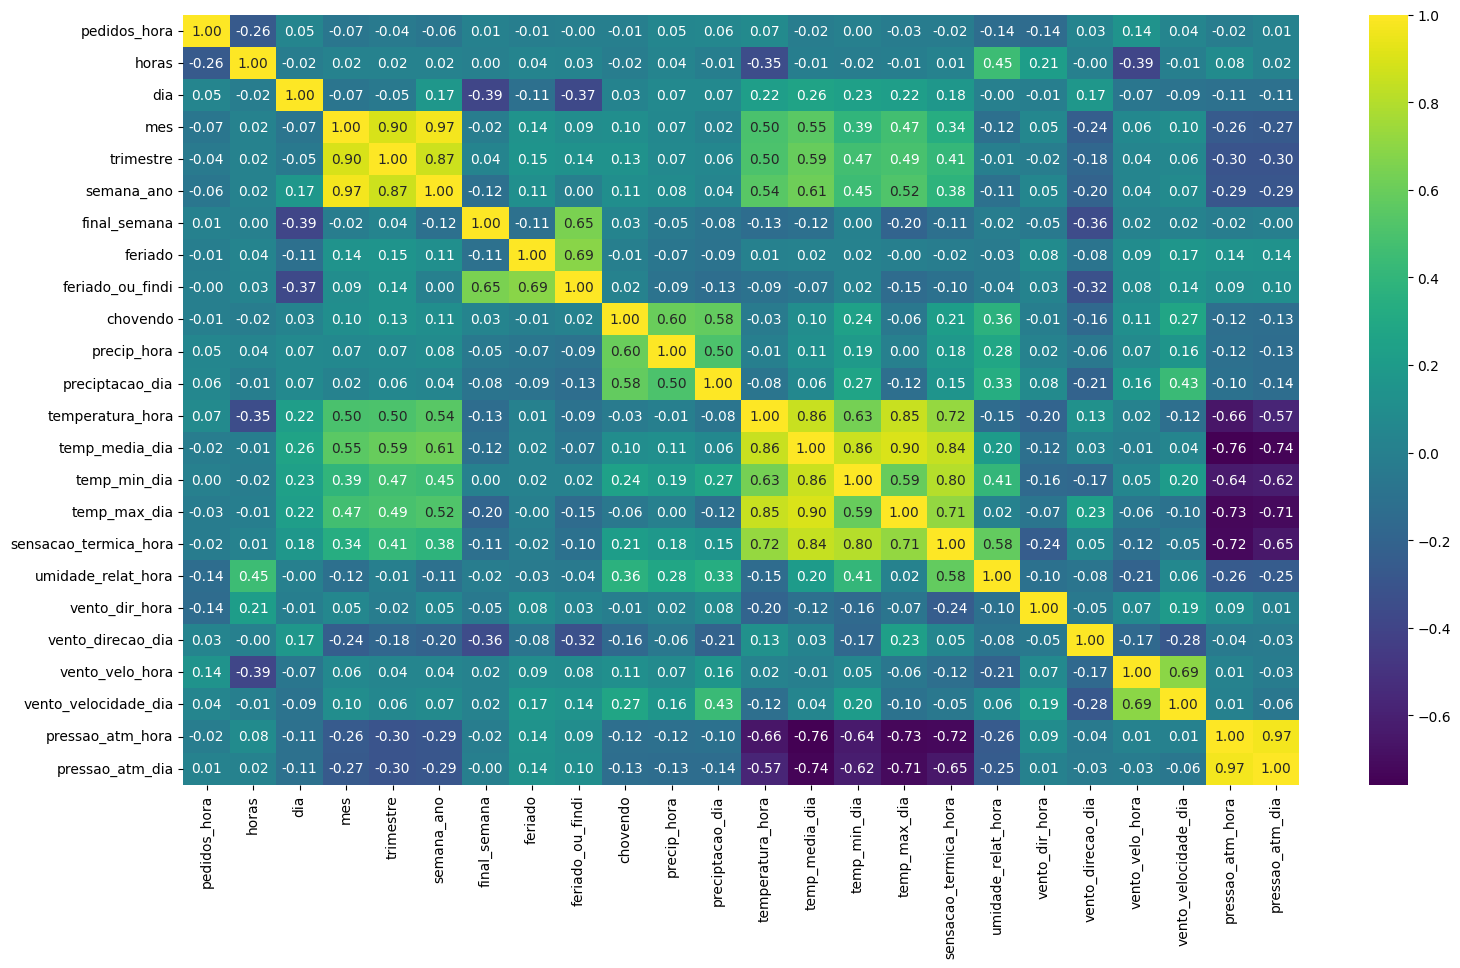

In [429]:
import seaborn as sns
plt.figure(figsize=(18, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f', cmap='viridis');

In [430]:
df.corr(numeric_only=True)['pedidos_hora'].sort_values(ascending=False) * 100

pedidos_hora             100.000000
vento_velo_hora           14.498393
temperatura_hora           7.489444
preciptacao_dia            5.793515
precip_hora                4.649766
dia                        4.504425
vento_velocidade_dia       3.988599
vento_direcao_dia          3.298469
pressao_atm_dia            1.262180
final_semana               0.535802
temp_min_dia               0.307527
feriado_ou_findi          -0.447340
chovendo                  -0.562411
feriado                   -1.089627
temp_media_dia            -2.018969
pressao_atm_hora          -2.198091
sensacao_termica_hora     -2.381341
temp_max_dia              -2.547289
trimestre                 -3.839321
semana_ano                -6.472979
mes                       -6.627146
umidade_relat_hora       -13.703961
vento_dir_hora           -14.053700
horas                    -26.398461
Name: pedidos_hora, dtype: float64

In [431]:
temp = df[[
    'pedidos_hora', 'vento_velo_hora', 'temperatura_hora',  
    'preciptacao_dia', 'precip_hora', 'dia',
    'vento_velocidade_dia', 'vento_direcao_dia', 'semana_ano', 
    'mes', 'umidade_relat_hora', 'vento_dir_hora', 'horas'
]]

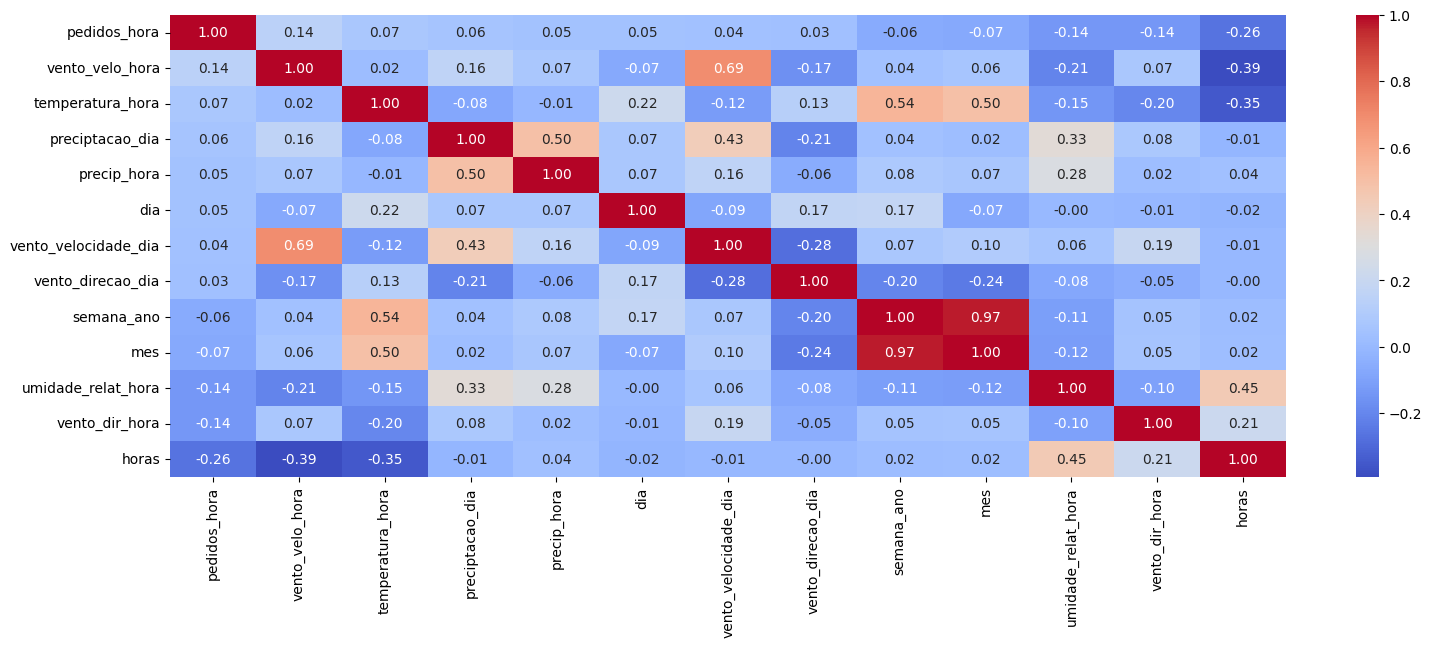

In [432]:
plt.figure(figsize=(18, 6))
sns.heatmap(temp.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm');

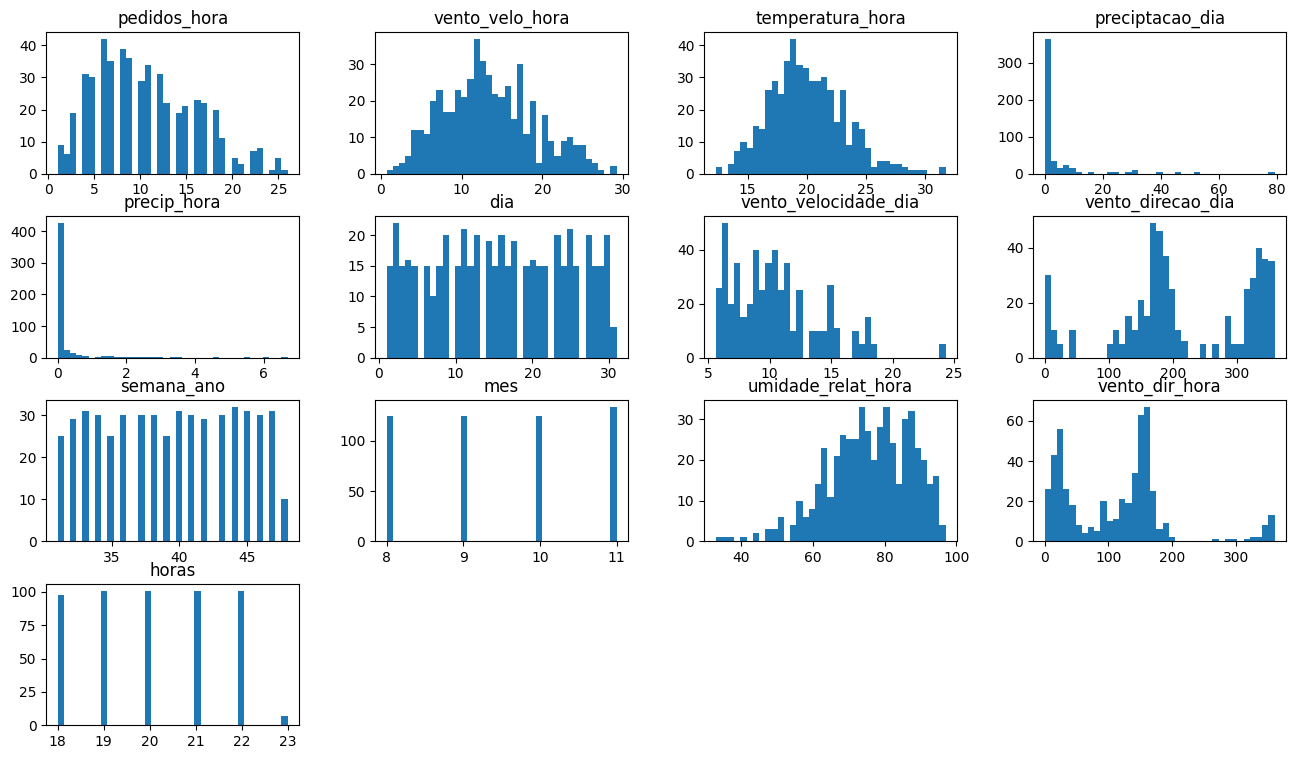

In [433]:
temp.hist(grid=False, bins=37, figsize=(16, 9));

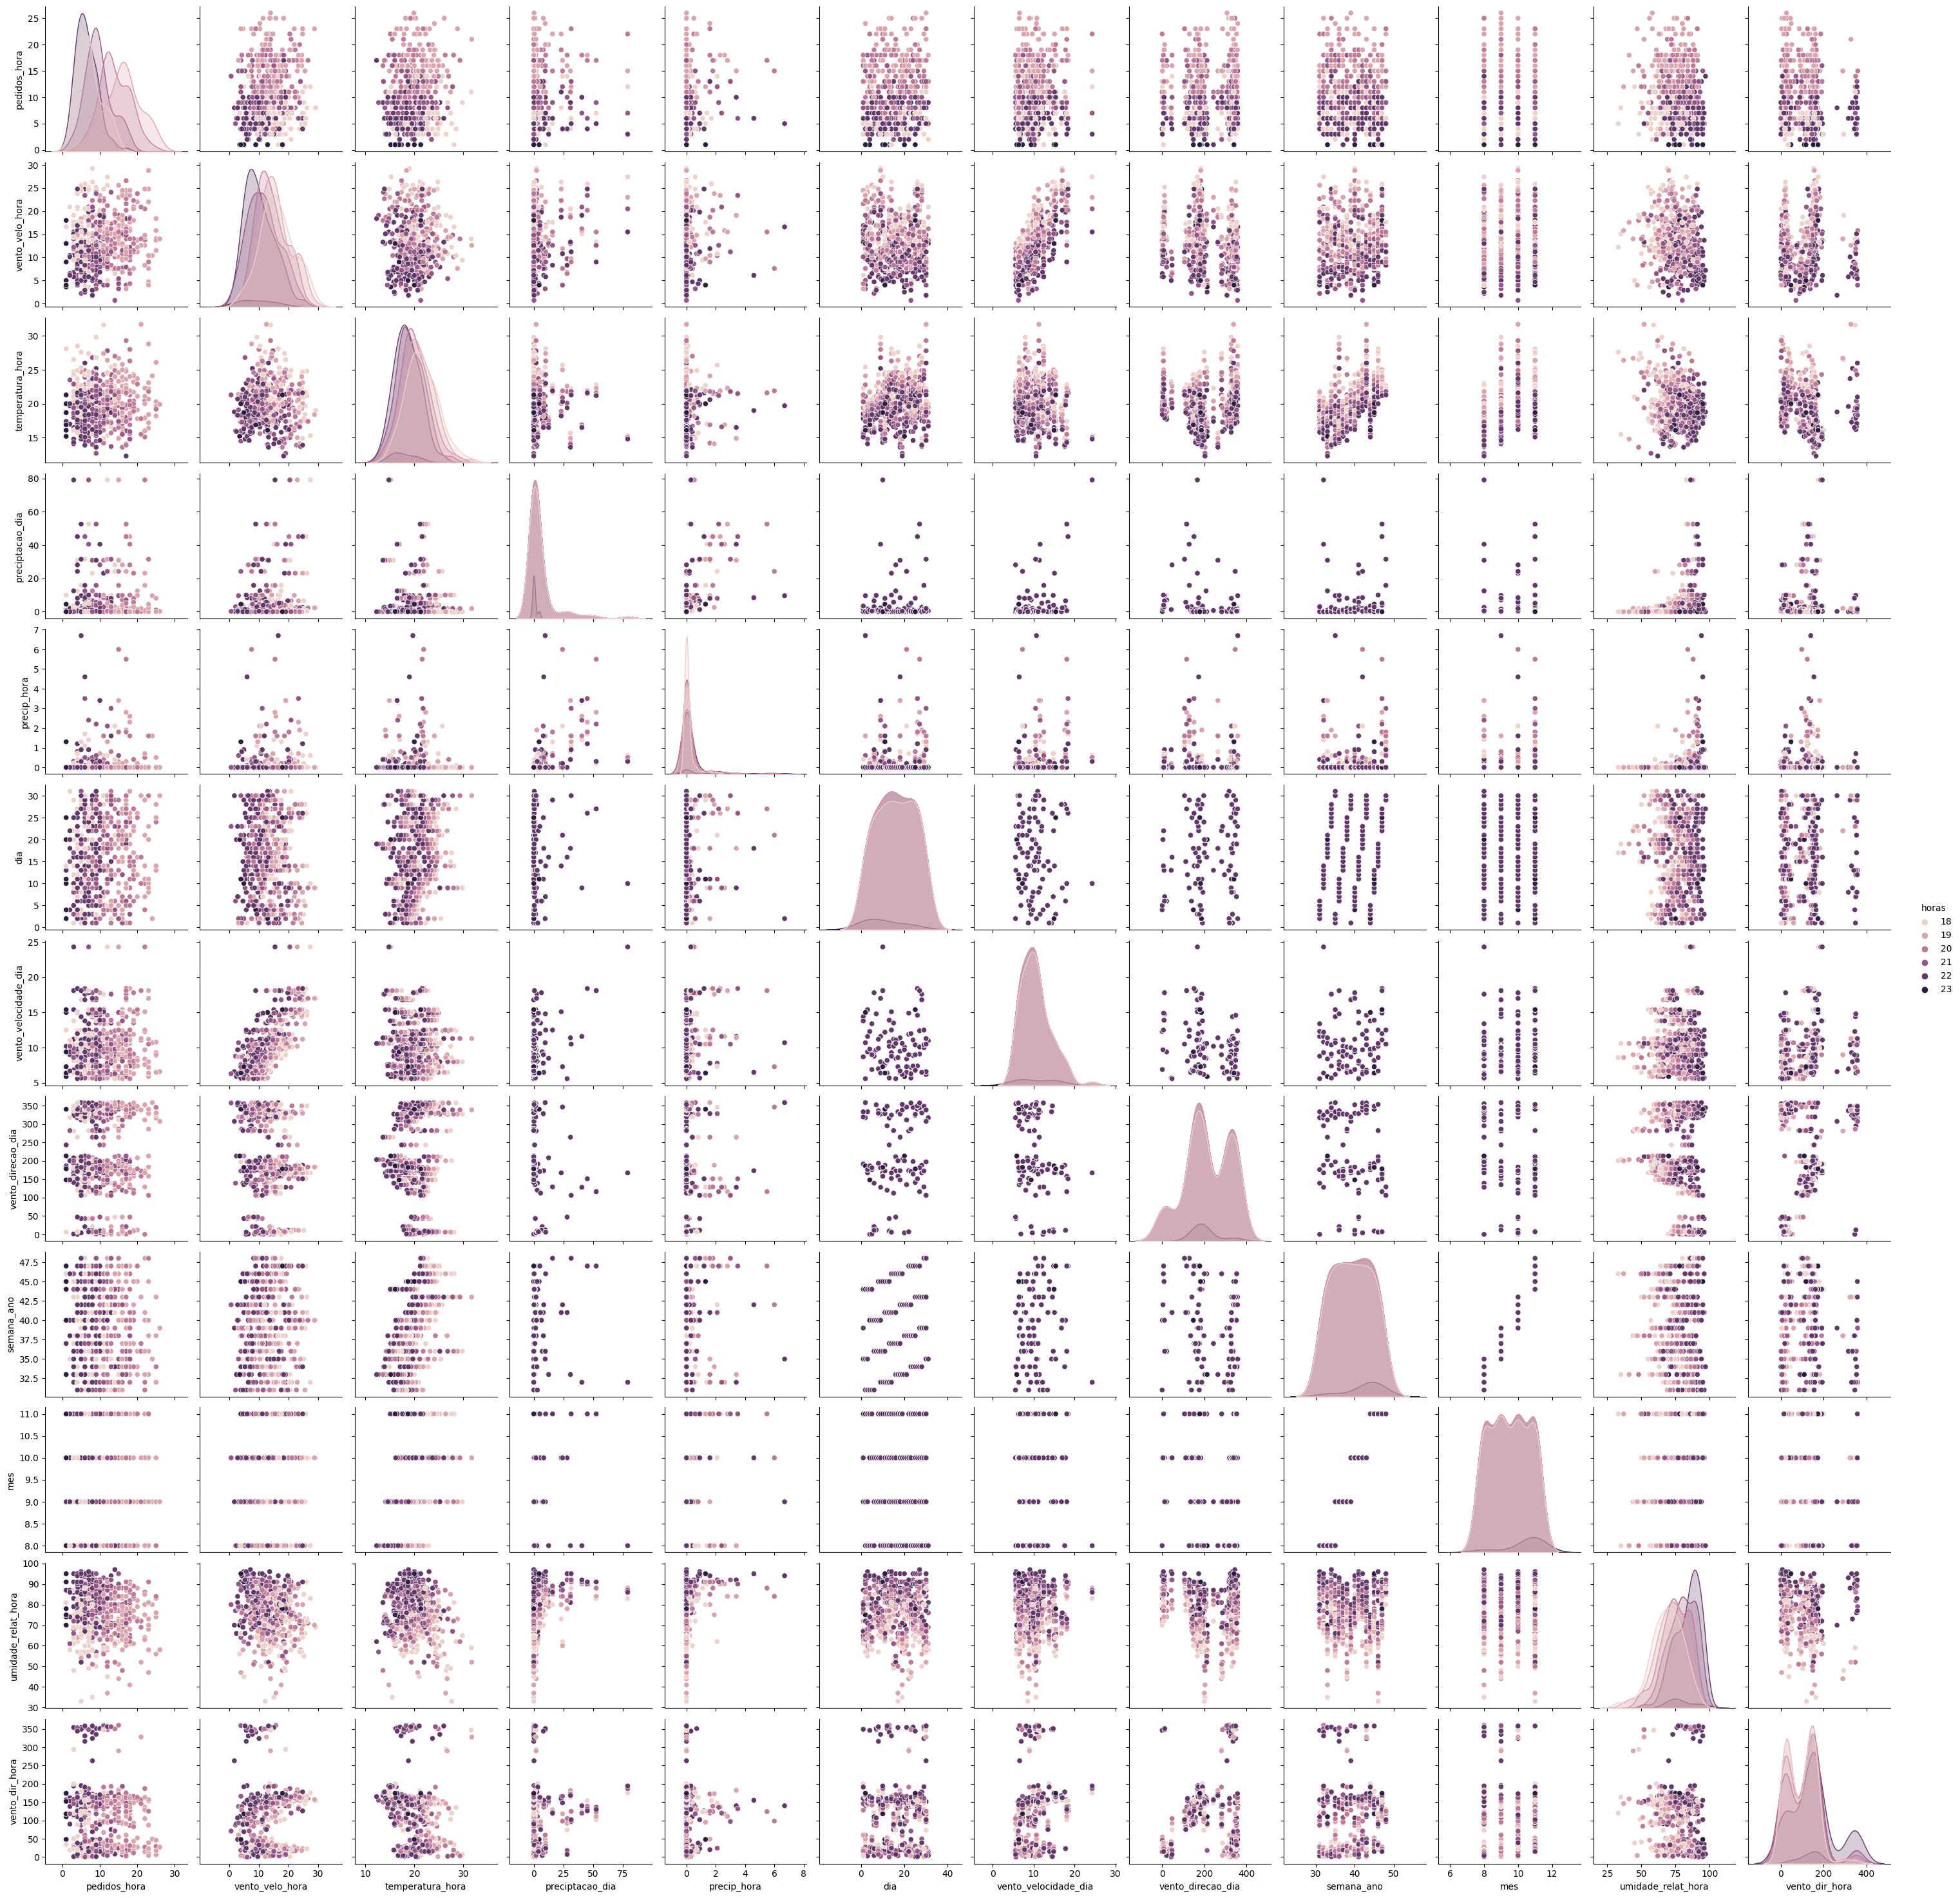

In [434]:
#sns.pairplot(temp, hue='horas')
#plt.savefig('pairplot1.pdf')
#plt.savefig('pairplot1.png', dpi=300)
#plt.show()

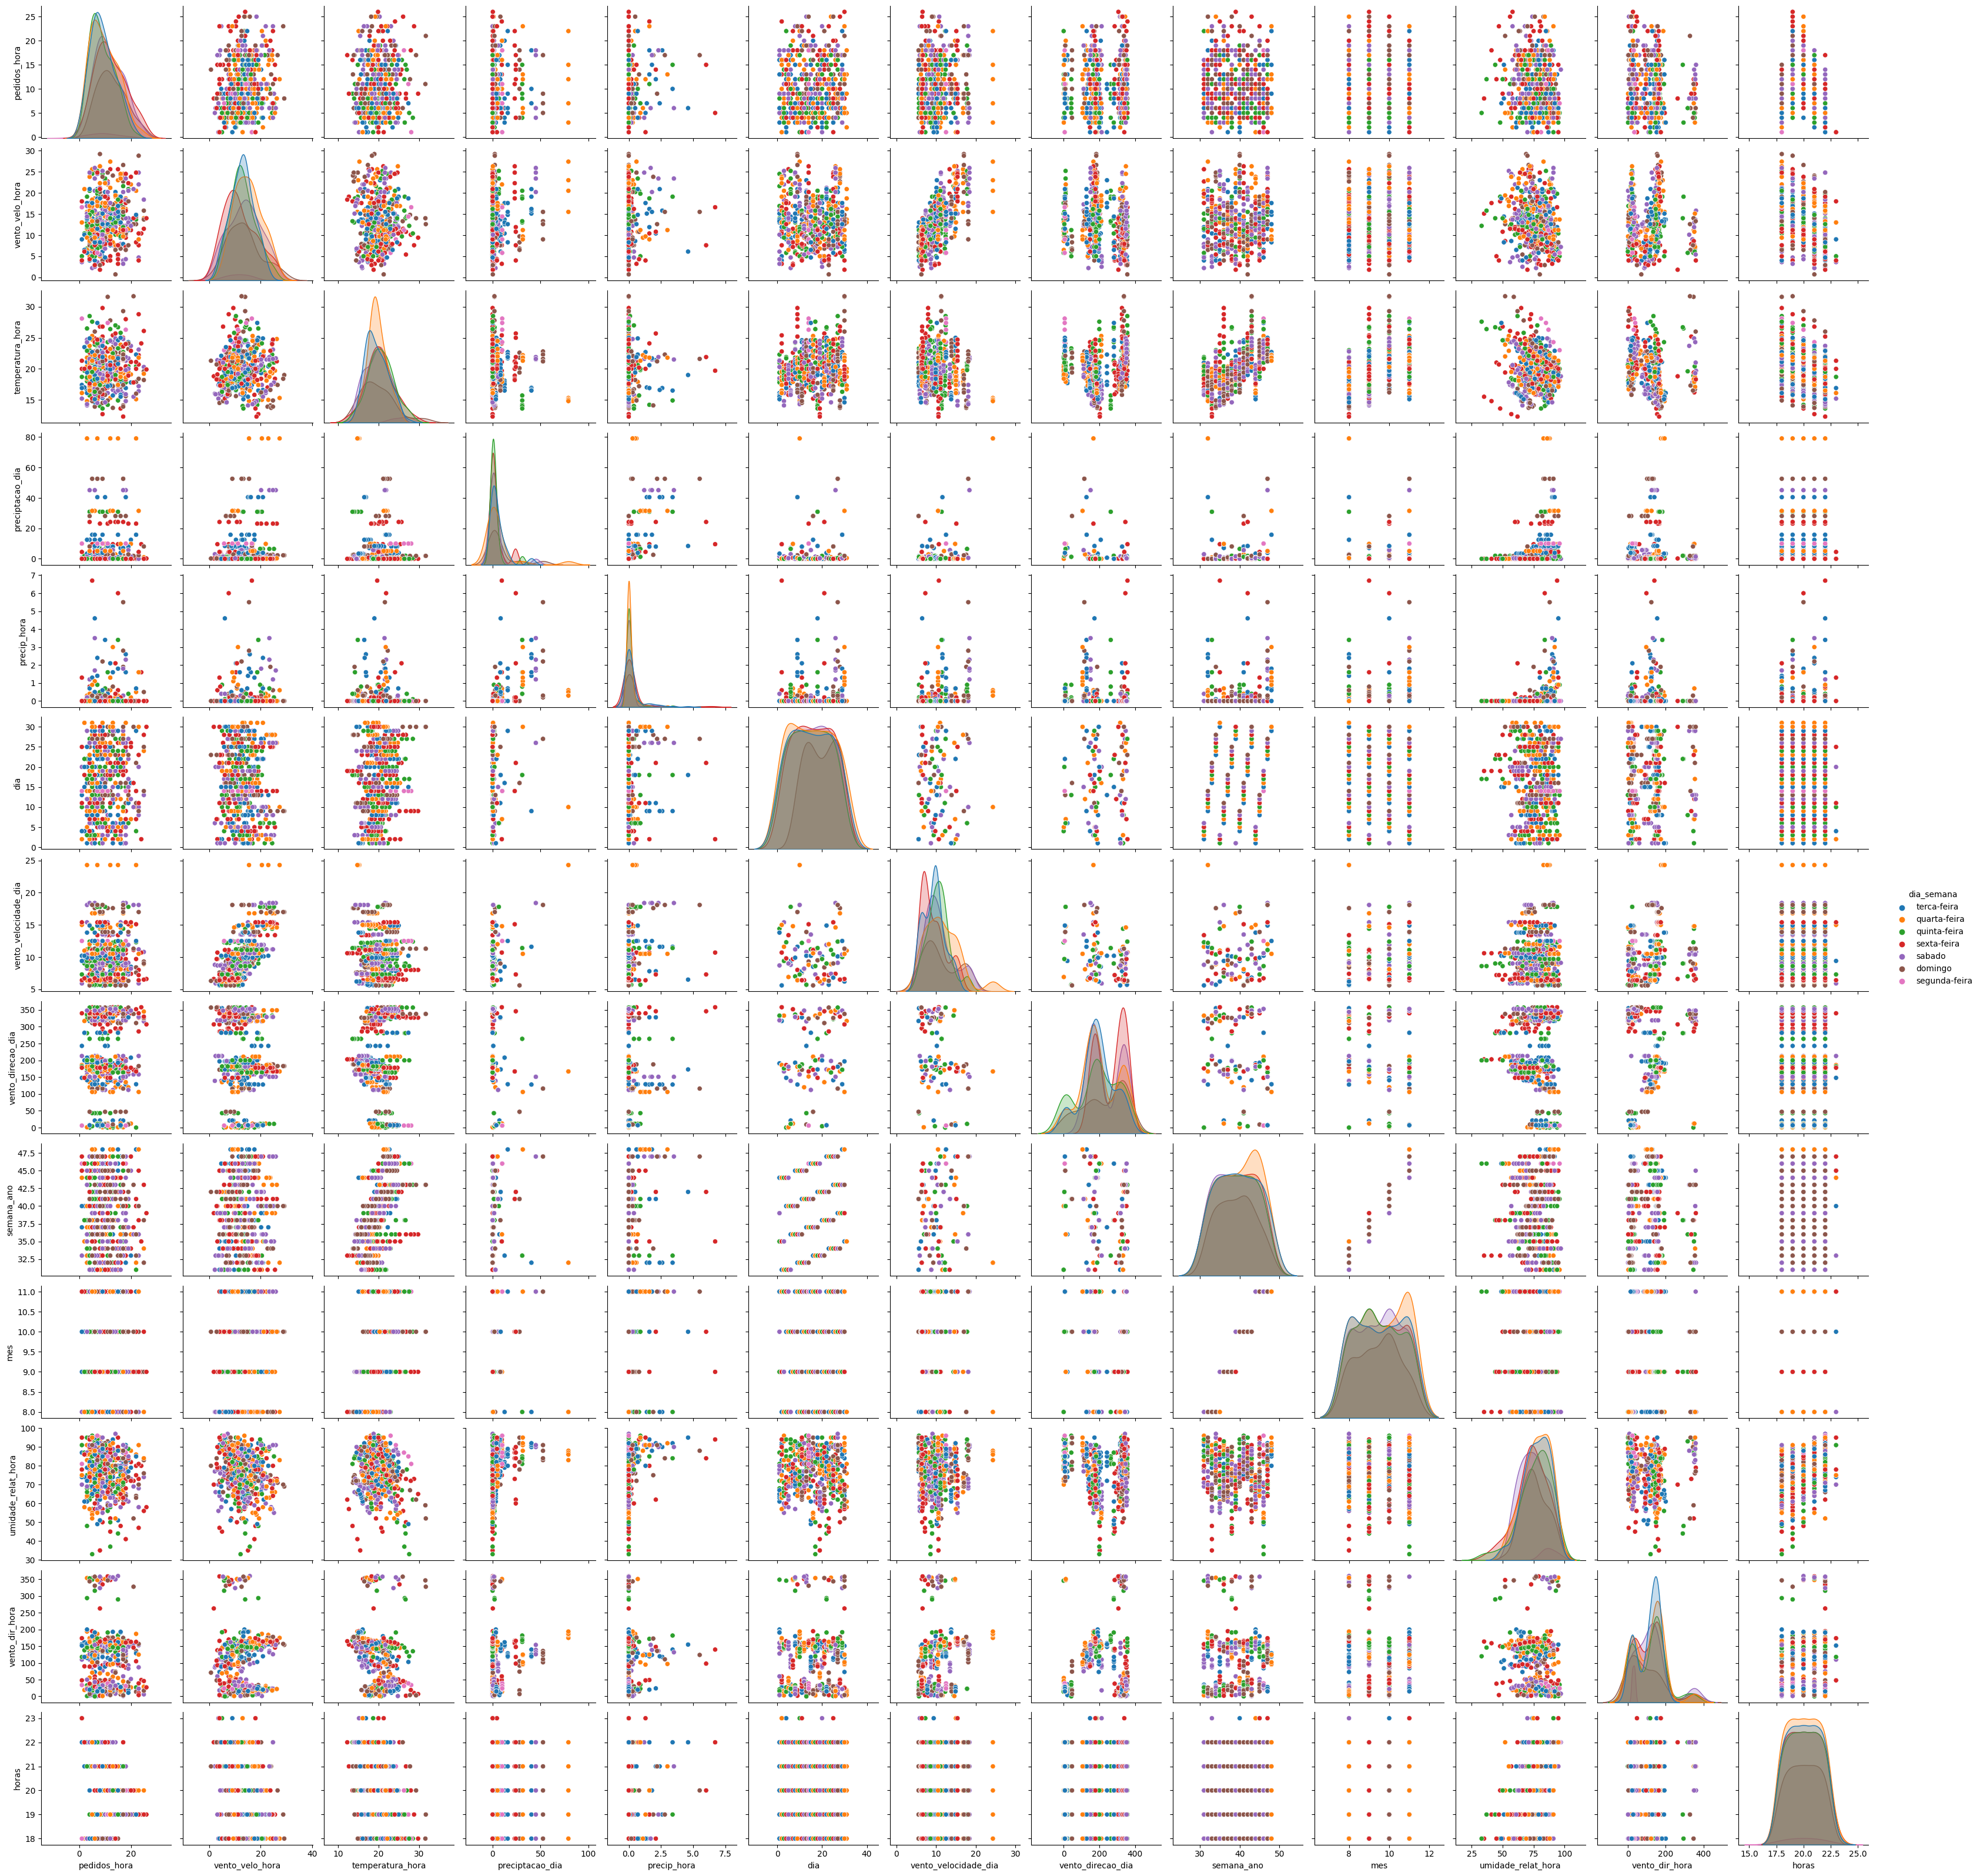

In [435]:
temp = df[['dia_semana',
    'pedidos_hora', 'vento_velo_hora', 'temperatura_hora',  
    'preciptacao_dia', 'precip_hora', 'dia',
    'vento_velocidade_dia', 'vento_direcao_dia', 'semana_ano', 
    'mes', 'umidade_relat_hora', 'vento_dir_hora', 'horas'
]]
#sns.pairplot(temp, hue='dia_semana')
#plt.savefig('pairplot2.pdf')
#plt.savefig('pairplot2.png', dpi=300)
#plt.show()

#### TODO: mais gráficos e explorar estatísticas

## Pré-processamento de Dados para Modelagem

In [436]:
df = df.loc[df['dia_semana'] != 'segunda-feira']
df = df.loc[df['horas'] != 23]

In [437]:
df.shape

(497, 28)

In [438]:
print(df.horas.unique())
print(df.dia_semana.unique())

[18 19 20 21 22]
['terca-feira' 'quarta-feira' 'quinta-feira' 'sexta-feira' 'sabado'
 'domingo']


In [439]:
df.dia_semana = df.dia_semana.map({
    'domingo': 1, 'terca-feira': 3, 'quarta-feira': 4, 
    'quinta-feira': 5, 'sexta-feira': 6, 'sabado': 7
})

In [440]:
print(df.condicao_climatica.unique())

['Nublado/Chuva' 'Sol/Limpo' 'Chuva forte/Tempestade']


In [441]:
df.condicao_climatica = df.condicao_climatica.map({
    'Sol/Limpo': 1, 'Nublado/Chuva': 2, 'Chuva forte/Tempestade': 3, 
})

In [445]:
print(df.tipo_feriado.unique())
print(df.nome_feriado.unique())

[0 'Dia Convencional' 'Feriado Nacional' 'Facultativo' 'Feriado Municipal']
[0 'Dia do Estado de Santa Catarina' 'Dia dos Pais'
 'Independência do Brasil' 'Nossa Senhora Aparecida' 'Dia do Professor'
 'Dia do Servidor Público' 'Dia de Finados' 'Finados'
 'Proclamação da República' 'Dia de Santa Catarina de Alexandria']


In [446]:
df.tipo_feriado = df.tipo_feriado.map({
    0: 0, 'Dia Convencional': 1, 'Facultativo': 2, 
    'Feriado Municipal': 3, 'Feriado Nacional': 4
})

In [448]:
df.drop('nome_feriado', axis=1, inplace=True)

In [449]:
df.head()

pedidos_hora  condicao_climatica  dia_semana  horas  dia  mes  trimestre  \
0             6                   2           3     18    2    8          3   
1            10                   2           3     19    2    8          3   
2             4                   2           3     20    2    8          3   
3             9                   2           3     21    2    8          3   
4             4                   2           3     22    2    8          3   

   semana_ano  final_semana  feriado  feriado_ou_findi  tipo_feriado  \
0          31             0        0                 0             0   
1          31             0        0                 0             0   
2          31             0        0                 0             0   
3          31             0        0                 0             0   
4          31             0        0                 0             0   

   chovendo  precip_hora  preciptacao_dia  temperatura_hora  temp_media_dia  \
0         0          0.0              0.0              21.0            17.4   
1         0          0.0              0.0              19.6            17.4   
2         0          0.0              0.0              18.7            17.4   
3         0          0.0              0.0              17.7            17.4   
4         0          0.0              0.0              17.7            17.4   

   temp_min_dia  temp_max_dia  sensacao_termica_hora  umidade_relat_hora  \
0          14.0          21.8                   16.8                77.0   
1          14.0          21.8                   16.6                83.0   
2          14.0          21.8                   16.5                87.0   
3          14.0          21.8                   16.4                92.0   
4          14.0          21.8                   16.2                91.0   

   vento_dir_hora  vento_direcao_dia  vento_velo_hora  vento_velocidade_dia  \
0            35.0              317.0             11.2                   5.6   
1            31.0              317.0             11.9                   5.6   
2            29.0              317.0              9.7                   5.6   
3            27.0              317.0              5.0                   5.6   
4            18.0              317.0              4.0                   5.6   

   pressao_atm_hora  pressao_atm_dia  
0            1017.3           1018.7  
1            1017.4           1018.7  
2            1017.8           1018.7  
3            1018.5           1018.7  
4            1018.8           1018.7

In [450]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 497 entries, 0 to 508
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   pedidos_hora           497 non-null    int64  
 1   condicao_climatica     497 non-null    int64  
 2   dia_semana             497 non-null    int64  
 3   horas                  497 non-null    int64  
 4   dia                    497 non-null    int64  
 5   mes                    497 non-null    int64  
 6   trimestre              497 non-null    int64  
 7   semana_ano             497 non-null    int64  
 8   final_semana           497 non-null    int64  
 9   feriado                497 non-null    int64  
 10  feriado_ou_findi       497 non-null    int64  
 11  tipo_feriado           497 non-null    int64  
 12  chovendo               497 non-null    int64  
 13  precip_hora            497 non-null    float64
 14  preciptacao_dia        497 non-null    float64
 15  temper

In [451]:
X = df.drop('pedidos_hora', axis=1)
y = df['pedidos_hora']

In [453]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((397, 26), (100, 26), (397,), (100,))

In [456]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

for x in range(1, 101):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=x, test_size=0.2)
    tree = DecisionTreeRegressor(random_state=1).fit(X_train, y_train)
    tree_pred = tree.predict(X_test)
    tree_r2 = r2_score(y_test, tree_pred)
    print(f'{x} - {tree_r2 * 100:.2f}')

1 - -13.55
2 - 24.10
3 - 15.43
4 - 6.38
5 - -0.93
6 - 27.88
7 - -9.53
8 - -14.65
9 - 13.46
10 - -21.73
11 - 1.55
12 - -10.70
13 - -5.70
14 - 30.75
15 - 19.26
16 - 31.56
17 - 14.32
18 - -1.88
19 - -4.07
20 - -32.96
21 - 11.10
22 - -32.00
23 - 28.07
24 - 7.67
25 - -41.09
26 - 16.88
27 - -19.99
28 - 39.92
29 - 8.09
30 - 14.68
31 - 24.66
32 - 18.81
33 - 46.04
34 - 11.22
35 - 6.69
36 - 24.64
37 - -5.25
38 - 16.03
39 - 11.87
40 - 8.87
41 - -1.60
42 - 10.93
43 - 25.47
44 - 19.07
45 - 24.31
46 - -4.57
47 - 27.58
48 - 2.65
49 - 18.21
50 - 21.28
51 - 26.91
52 - 32.17
53 - 19.04
54 - -0.74
55 - -7.31
56 - 35.87
57 - 4.41
58 - 24.06
59 - 10.41
60 - 25.81
61 - 17.12
62 - 11.18
63 - -7.76
64 - 9.75
65 - 8.77
66 - 34.78
67 - 1.40
68 - -4.71
69 - 23.72
70 - -11.82
71 - 25.55
72 - 17.44
73 - -2.29
74 - 11.95
75 - 8.27
76 - 23.59
77 - 6.16
78 - 4.40
79 - 22.11
80 - 26.03
81 - 18.10
82 - -11.02
83 - 16.68
84 - -10.63
85 - 8.00
86 - 13.61
87 - 30.92
88 - 32.67
89 - 9.92
90 - -2.74
91 - 16.79
92 - 16.58
93

#### 28 - 39.92

In [457]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=28, test_size=0.2)

In [458]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor().fit(X_train, y_train)
y_pred = model.predict(X_test)

In [460]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'{mae:.2f} - {r2 * 100 :.2f}')

2.77 - 57.30


In [463]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

def hyper_tunning():
    model = RandomForestRegressor()

    param_grid = {
        'n_estimators': np.arange(5, 500, 10),
        'max_depth': np.arange(1, 20),
        'min_samples_split': np.arange(2, 10),
        'min_samples_leaf': np.arange(1, 10)
    }


    rf_random = RandomizedSearchCV(estimator=model,
                                   param_distributions=param_grid, 
                                   n_iter=100, 
                                   cv=5,
                                   verbose=2, 
                                   random_state=42,
                                   n_jobs=-1)


    rf_random.fit(X_train, y_train)
    print(rf_random.best_params_)

In [461]:
hyper_tunning()

Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'n_estimators': 65, 'min_samples_split': 7, 'min_samples_leaf': 5, 'max_depth': 15}


In [464]:
hyper_tunning()

Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'n_estimators': 35, 'min_samples_split': 2, 'min_samples_leaf': 6, 'max_depth': 19}


In [466]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor()

param_grid = {
    'n_estimators': [35, 65, 100, 250, 500],
    'max_depth': [15, 19],
    'min_samples_split': [2, 4,5, 7],
    'min_samples_leaf': [5, 6]
}

rf_grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
rf_grid.fit(X_train, y_train)
print(rf_grid.best_params_)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
{'max_depth': 19, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 65}


In [471]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

def criar_modelo(x=1):
    model = RandomForestRegressor(n_jobs=-1, 
                                  max_depth=19, 
                                  min_samples_leaf=5, 
                                  min_samples_split=2, 
                                  n_estimators=65,
                                 random_state=x)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred, squared=False)
    rmse = mean_squared_error(y_test, y_pred)
    print(f'{x} - {r2*100:.2f} - {mae:.2f} - {mse:.2f} - {rmse:.2f} - {mape*100:.2f}')
    

In [472]:
criar_modelo()

1 - 59.20 - 2.73 - 3.47 - 12.05 - 36.23


In [478]:
"""for x in range(1, 101):
    criar_modelo(x)"""

'for x in range(1, 101):\n    criar_modelo(x)'

In [477]:
"""for n in range(1, 101):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=n, test_size=0.2)
    print(n, end=' ')
    criar_modelo()"""

"for n in range(1, 101):\n    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=n, test_size=0.2)\n    print(n, end=' ')\n    criar_modelo()"


        R2,    MAE,   MSE,    RMSE,   MAPE
- 18 1 - 51.31 - 2.43 - 3.31 - 10.97 - 28.44
- 40 1 - 51.80 - 2.57 - 3.42 - 11.70 - 34.16
- 44 1 - 57.52 - 2.59 - 3.44 - 11.86 - 25.79
- 57 1 - 48.58 - 2.60 - 3.51 - 12.34 - 32.42
- 66 1 - 62.99 - 2.60 - 3.36 - 11.26 - 31.52
- 62 1 - 61.25 - 2.60 - 3.32 - 11.02 - 37.36


In [479]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=18, test_size=0.2)

In [481]:
"""for X in range(1, 101):
    criar_modelo(X)"""

'for X in range(1, 101):\n    criar_modelo(X)'

* 4 - 52.60 - 2.39 - 3.27 - 10.68 - 28.14
* 87 - 52.29 - 2.39 - 3.28 - 10.75 - 28.02
* 95 - 52.35 - 2.40 - 3.28 - 10.73 - 27.95
* 85 - 53.35 - 2.40 - 3.24 - 10.51 - 28.51
* 69 - 52.64 - 2.40 - 3.27 - 10.67 - 28.16
* 26 - 51.52 - 2.40 - 3.30 - 10.92 - 28.06
* 18 - 52.47 - 2.40 - 3.27 - 10.71 - 28.11

In [482]:
criar_modelo(4)

4 - 52.60 - 2.39 - 3.27 - 10.68 - 28.14


In [486]:
model = RandomForestRegressor(n_jobs=-1, 
                              max_depth=19, 
                              min_samples_leaf=5, 
                              min_samples_split=2, 
                              n_estimators=65,
                             random_state=4)

In [487]:
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=19, min_samples_leaf=5, n_estimators=65,
                      n_jobs=-1, random_state=4)

In [489]:
for col, imp in zip(X_train.columns, model.feature_importances_):
    print(f'{col} - {imp * 100:.2f}')

condicao_climatica - 0.23
dia_semana - 8.95
horas - 62.21
dia - 2.20
mes - 0.04
trimestre - 0.06
semana_ano - 1.04
final_semana - 0.14
feriado - 0.03
feriado_ou_findi - 0.28
tipo_feriado - 0.05
chovendo - 0.04
precip_hora - 0.12
preciptacao_dia - 1.94
temperatura_hora - 1.17
temp_media_dia - 1.50
temp_min_dia - 2.54
temp_max_dia - 1.32
sensacao_termica_hora - 1.68
umidade_relat_hora - 1.56
vento_dir_hora - 2.91
vento_direcao_dia - 2.31
vento_velo_hora - 1.59
vento_velocidade_dia - 3.05
pressao_atm_hora - 1.76
pressao_atm_dia - 1.31


#### TODO:

K-fold cross-validation e stratified cross-validation são técnicas comuns de validação cruzada usadas para avaliar a capacidade de generalização de modelos de aprendizado de máquina. Ambas as técnicas dividem os dados em conjuntos de treinamento e validação e permitem que o modelo seja avaliado em diferentes combinações de dados.

A principal diferença entre essas técnicas é que o stratified cross-validation garante que as proporções de cada classe de dados sejam mantidas em cada conjunto de treinamento e validação, enquanto o k-fold cross-validation não garante isso.

No k-fold cross-validation, os dados são divididos aleatoriamente em k conjuntos de tamanho aproximadamente igual. Em seguida, o modelo é treinado k vezes, cada vez usando um conjunto diferente como conjunto de validação e os k-1 conjuntos restantes como conjunto de treinamento. O resultado final é a média das k avaliações do modelo.

O stratified cross-validation, por outro lado, divide os dados de tal forma que as proporções de cada classe de dados sejam mantidas em cada conjunto de treinamento e validação. Essa abordagem é particularmente útil quando há um desequilíbrio de classes nos dados originais, pois garante que cada conjunto de treinamento e validação contenha uma proporção representativa das classes.

Em resumo, a principal diferença entre k-fold cross-validation e stratified cross-validation é que o stratified cross-validation garante que as proporções de cada classe de dados sejam mantidas em cada conjunto de treinamento e validação, enquanto o k-fold cross-validation não garante isso. A escolha entre as técnicas depende das características dos dados e das metas do modelo.